In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
!pip install pickle5
import pickle5 as pickle
import pprint

import gensim.models
import gensim.downloader

from sklearn.manifold import TSNE

plt.style.use('ggplot')

     |████████████████████████████████| 133kB 14.6MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219248 sha256=09fff81ecc3fb6dcac06ea48ffd5ae4daf61ad91a40869b365e4aa75a17d2a31
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pickle.load(open('/content/drive/MyDrive/left_data.pickle', 'rb'))

In [ ]:
data

{'anarcho':                                                  body
 0   [without, the, context, of, the, actual, post,...
 1   [you, have, be, turn, in, perhaps, unwitting, ...
 2   [if, may, play, semantics, bit, in, my, opinio...
 4   [those, who, serve, be, not, serve, our, count...
 5   [to, aid, mobile, user, will, link, small, sub...
 ..                                                ...
 11  [like, this, answer, ideally, militant, comrad...
 12  [anarchy, well, that, subreddit, seem, to, pro...
 13  [odd, have, never, notice, that, before, it, s...
 14  [ideally, yes, they, would, in, reality, they,...
 15  [the, main, anarchism, relate, sub, be, anarch...
 
 [66 rows x 1 columns],
 'hillary':                                                      body
 0       [oh, poor, donald, trump, and, his, fragile, m...
 1       [his, undercurrent, of, supporter, be, either,...
 2       [well, give, that, it, be, be, shitshow, for, ...
 3                                  [yes, like, year, ag

In [ ]:
words = ['word', 'freedom', 'trust', 'radical', 'democracy', 'privacy', 'safety',
         'right','police','healthcare','government','restriction','accountability',
         'correct','political','cancel','culture','constitution','conventional',
         'authoritarian','tradition','leadership']

In [ ]:
anarcho_cbow = gensim.models.Word2Vec(sentences=data['anarcho']['body'], size=50, window = 5, min_count = 5, workers = 10, sg = 0)

anarcho_sg = gensim.models.Word2Vec(sentences=data['anarcho']['body'], size=50, window = 5, min_count = 5, workers = 10, sg = 1)

hillary_cbow = gensim.models.Word2Vec(sentences=data['hillary']['body'], size=50, window = 5, min_count = 5, workers = 10, sg = 0)

hillary_sg = gensim.models.Word2Vec(sentences=data['hillary']['body'], size=50, window = 5, min_count = 5, workers = 10, sg = 1)

progressive_cbow = gensim.models.Word2Vec(sentences=data['progressive']['body'], size=50, window = 5, min_count = 5, workers = 10, sg = 0)

progressive_sg = gensim.models.Word2Vec(sentences=data['progressive']['body'], size=50, window = 5, min_count = 5, workers = 10, sg = 1)

sanders_cbow = gensim.models.Word2Vec(sentences=data['sanders']['body'], size=50, window = 5, min_count = 5, workers = 10, sg = 0)

sanders_sg = gensim.models.Word2Vec(sentences=data['sanders']['body'], size=50, window = 5, min_count = 5, workers = 10, sg = 1)


done


In [ ]:
def similar_df(cbow_model, sg_model, word_list):

  import pandas as pd

  vocab_cbow = {}
  vocab_sg = {}

  for _ in word_list:
      vocab_cbow[_] = cbow_model.most_similar(_)
      vocab_sg[_] = sg_model.most_similar(_)

  similar_cbow = {}
  similar_sg = {}

  for i in word_list:
    similar_cbow[f'{i}'] = [vocab_cbow[i][j][0] for j in range(len(vocab_cbow[i]))]
    similar_sg[f'{i}'] = [vocab_sg[i][j][0] for j in range(len(vocab_sg[i]))]

  return pd.DataFrame(data = similar_cbow), pd.DataFrame(data = similar_sg)

In [ ]:
hillary_cbow_words, hillary_sg_words = similar_df(hillary_cbow, hillary_sg, words)

hillary_cbow_words.to_excel('hillary_cbow_words.xlsx')
hillary_sg_words.to_excel('hillary_sg_words.xlsx')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
sanders_cbow_words, sanders_sg_words = similar_df(sanders_cbow, sanders_sg, words)

sanders_cbow_words.to_excel('sanders_cbow_words.xlsx')
sanders_sg_words.to_excel('sanders_sg_words.xlsx')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
progressive_cbow_words, progressive_sg_words = similar_df(progressive_cbow, progressive_sg, words)

progressive_cbow_words.to_excel('progressive_cbow_words.xlsx')
progressive_sg_words.to_excel('progressive_sg_words.xlsx')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
def tsne_plot(model, vocab):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=0)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    fig, axs = plt.subplots(figsize=(8,8))
    axs.set_title('Word Clusters')
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
        
    plt.show()

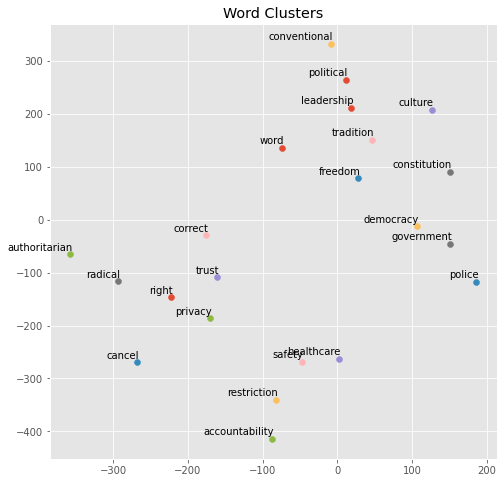

In [ ]:
tsne_plot(hillary_sg, words)

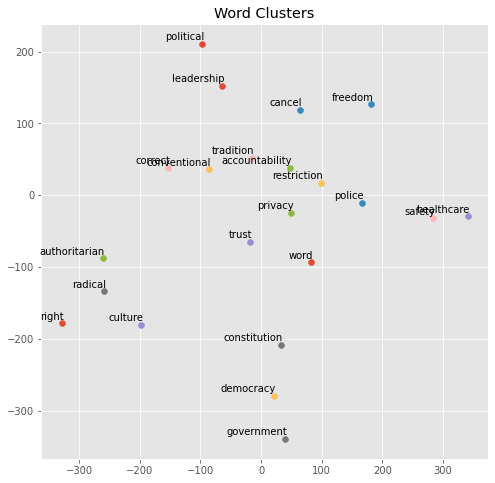

In [ ]:
tsne_plot(hillary_cbow, words)

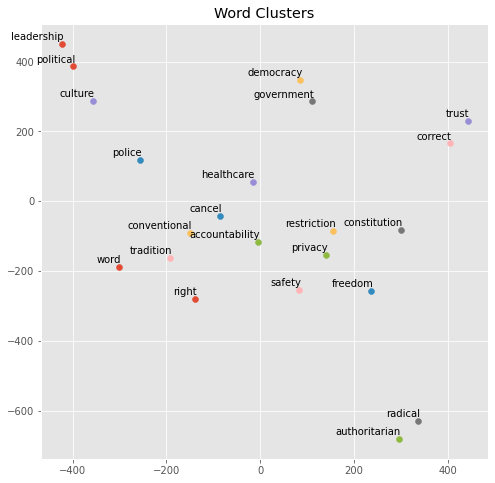

In [ ]:
tsne_plot(sanders_sg, words)

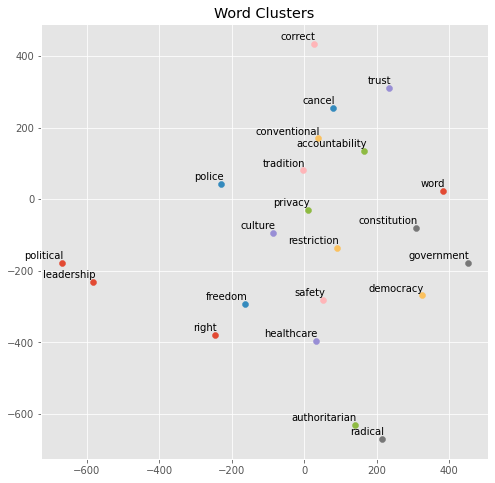

In [ ]:
tsne_plot(sanders_cbow, words)

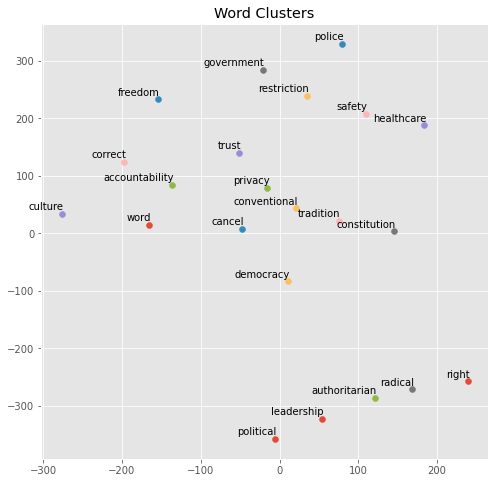

In [ ]:
tsne_plot(progressive_sg, words)

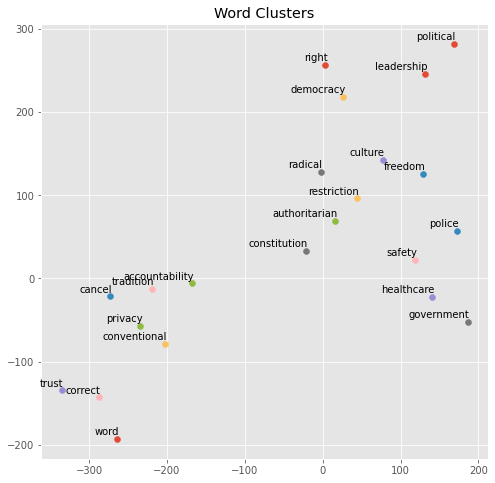

In [ ]:
tsne_plot(progressive_cbow, words)